### Student Information
Name: Frida Hammarberg

Student ID: x1060029

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [622]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [623]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta
#import all the necessary libraries

3.1 Converting Dictionary into Pandas dataframe

In [624]:
#read the data, creates a dataframe
df1 = pd.read_table('sentiment_labelled_sentences/amazon_cells_labelled.txt', sep='\t', header=None, names=['sentence', 'score'])

In [625]:
len(df1)

1000

In [626]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [627]:
df1[0:5]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [628]:
file = open("sentiment_labelled_sentences/imdb_labelled.txt", "r")
lines = file.readlines()
len(lines)

1000

In [629]:
print(type(lines))

<class 'list'>


In [630]:
print(lines[0])

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0



In [631]:
df2 = pd.DataFrame(lines)

In [632]:
df2[0:5]

,0
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...
3,Very little music or anything to speak of. \t0\n
4,The best scene in the movie was when Gerardo i...


In [633]:
len(df2)

1000

In [634]:
df2_sep = df2[0].apply(lambda x: pd.Series(x.split("\t")))

In [635]:
df2_sep[0:5]

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0\n
1,Not sure who was more lost - the flat characte...,0\n
2,Attempting artiness with black & white and cle...,0\n
3,Very little music or anything to speak of.,0\n
4,The best scene in the movie was when Gerardo i...,1\n


In [636]:
df2_sep[1] = df2_sep[1].map(lambda x: x.strip("\n"))

In [637]:
df2_sep[0:5]

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [638]:
#rename the columns to 'sentence' and 'score'
df2_sep.rename(columns={0: 'sentence', 1: 'score'}, inplace=True)

In [639]:
df2_sep[0:5]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [640]:
df3 = pd.read_table('sentiment_labelled_sentences/yelp_labelled.txt', sep='\t', header=None, names=['sentence', 'score'])

In [641]:
df = pd.concat([df1, df2_sep, df3])

In [642]:
len(df)

3000

3.2 Familiarizing yourself with the Data

In [643]:
df[998:1003]

,sentence,score
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


In [644]:
df.reset_index(drop=True, inplace=True)

In [645]:
df[998:1003]

,sentence,score
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0
1000,"A very, very, very slow-moving, aimless movie ...",0
1001,Not sure who was more lost - the flat characte...,0
1002,Attempting artiness with black & white and cle...,0


In [646]:
df[-11:-1]

,sentence,score
2989,I would avoid this place if you are staying in...,0
2990,The refried beans that came with my meal were ...,0
2991,Spend your money and time some place else.,0
2992,A lady at the table next to us found a live gr...,0
2993,the presentation of the food was awful.,0
2994,I can't tell you how disappointed I was.,0
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [647]:
df.shape

(3000, 2)

In [648]:
print(df[3:7]['sentence'])

3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
Name: sentence, dtype: object


In [649]:
df[1:7]['score']

1    1
2    1
3    0
4    1
5    0
6    0
Name: score, dtype: object

In [650]:
df.iloc[::10, :][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [651]:
df[0:11][["score", "sentence"]]

,score,sentence
0,0,So there is no way for me to plug it in here i...
1,1,"Good case, Excellent value."
2,1,Great for the jawbone.
3,0,Tied to charger for conversations lasting more...
4,1,The mic is great.
5,0,I have to jiggle the plug to get it to line up...
6,0,If you have several dozen or several hundred c...
7,1,If you are Razr owner...you must have this!
8,0,"Needless to say, I wasted my money."
9,0,What a waste of money and time!.


In [652]:
df[0:5]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [653]:
df['score_name']='negative'

In [654]:
df[0:5]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,negative
2,Great for the jawbone.,1,negative
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,negative


In [655]:
df['score'][0:5]

0    0
1    1
2    1
3    0
4    1
Name: score, dtype: object

In [656]:
print(type(df['score']))

<class 'pandas.core.series.Series'>


In [657]:
df.loc[df['score'].astype(int) > 0, 'score_name'] = 'positive'

In [658]:
df[0:5]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive


4.1 Missing Values

In [659]:
df.isnull()

,sentence,score,score_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [660]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

In [661]:
dummy_series = pd.Series(['dummy_record'], index=["sentence"])

In [662]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [663]:
len(result_with_series)

3001

In [664]:
ds2 = pd.Series([1], index=["score"])

In [665]:
ds2

score    1
dtype: int64

In [666]:
result_with_series2 = result_with_series.append(ds2, ignore_index=True)

In [667]:
result_with_series2.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 1)
score         (The amoung of missing records is: , 1)
score_name    (The amoung of missing records is: , 2)
dtype: object

In [668]:
len(result_with_series2)

3002

In [669]:
df = result_with_series2
#is there any drawbacks doing like this? Can you just refer to another table so easy?

In [670]:
len(df)

3002

In [671]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 1)
score         (The amoung of missing records is: , 1)
score_name    (The amoung of missing records is: , 2)
dtype: object

In [672]:
df.dropna(inplace=True)

In [673]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence      (The amoung of missing records is: , 0)
score         (The amoung of missing records is: , 0)
score_name    (The amoung of missing records is: , 0)
dtype: object

In [674]:
len(df)

3000

4.2 Dealing with Duplicate Data

In [675]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [676]:
sum(df.duplicated())

17

In [677]:
sum(df.duplicated('sentence'))

17

In [678]:
pd.concat(g for _, g in df.groupby("sentence") if len(g) > 1)

,sentence,score,score_name
1125,10/10,1,positive
1788,10/10,1,positive
1090,Definitely worth checking out.,1,positive
1363,Definitely worth checking out.,1,positive
446,Does not fit.,0,negative
748,Does not fit.,0,negative
180,Don't buy this product.,0,negative
543,Don't buy this product.,0,negative
402,Excellent product for the price.,1,positive
892,Excellent product for the price.,1,positive


In [679]:
len(df)

3000

In [680]:
df.drop_duplicates(keep=False, inplace=True)

In [681]:
len(df)

2966

 5.1 Sampling

In [682]:
df_sample = df.sample(n=1000)

In [683]:
len(df_sample)

1000

In [684]:
df_sample.shape

(1000, 3)

In [685]:
df_sample[0:5]

,sentence,score,score_name
1242,"If good intentions made a film great, then thi...",1,positive
791,I own 2 of these cases and would order another.,1,positive
1343,Barney is definitely super DE duper.,1,positive
1900,"Otherwise, don't even waste your time on this.",0,negative
2580,Boy was that sucker dry!!.,0,negative


In [686]:
len(df)

2966

In [687]:
sum(df['score_name']=='positive')

1480

In [688]:
sum(df['score_name']=='negative')

1486

In [689]:
sum(df['score_name']=='positive')+sum(df['score_name']=='negative')

2966

In [690]:
df_score_counts = ta.get_tokens_and_frequency(list(df['score_name']))

In [691]:
print(type(df_score_counts))

<class 'tuple'>


In [692]:
print(df_score_counts)

(odict_keys(['negative', 'positive']), odict_values([1486, 1480]))


In [693]:
print(list(df['score_name'][0:10]))

['negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative']


In [694]:
df_sample_score_counts = ta.get_tokens_and_frequency(list(df_sample['score_name']))

In [695]:
py.iplot(ta.plot_word_frequency(df_score_counts, "Score distribution"))

In [696]:
py.iplot(ta.plot_word_frequency(df_sample_score_counts, "Score distribution"))

In [697]:
#Exercise plotta de bredvid varandra

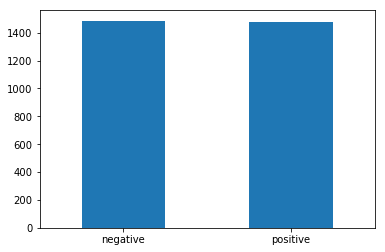

In [698]:
df['score_name'].value_counts().plot(kind='bar', rot=0)

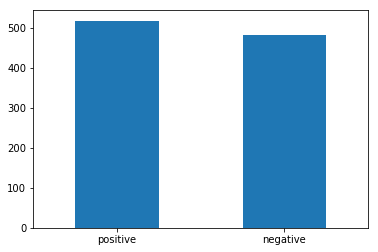

In [699]:
df_sample['score_name'].value_counts().plot(kind='bar', rot=0)

5.2 Feature Creation

In [700]:
import nltk

In [701]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [702]:
df[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [703]:
df[0:4]

,sentence,score,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [704]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [705]:
list(df[4:5]['unigrams'])

[['The', 'mic', 'is', 'great', '.']]

5.3 Feature subset selection

In [706]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence'])

In [707]:
print(type(df['sentence'])) #the same type as 'X.text' in the lab

<class 'pandas.core.series.Series'>


In [708]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(df[4:5]['sentence'])))

['the', 'mic', 'is', 'great']

In [709]:
df_counts.shape

(2966, 5153)

In [710]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [711]:
df[0:5]

,sentence,score,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"


In [712]:
df_counts[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [713]:
count_vect.transform(['Something awesome!']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [714]:
count_vect.transform(['00 Something awesome!']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [715]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [716]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [717]:
plot_y = ["doc_"+str(i) for i in list(df.index)[0:20]]

In [718]:
print(type(df.index)) #same as in lab, the method .index exist for dataframes as well

<class 'pandas.core.indexes.numeric.Int64Index'>


In [719]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=2966)

In [720]:
plot_z = df_counts[0:20, 0:20].toarray()

In [721]:
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z)) #Ska det se ut såhär?

In [722]:
#Exercise!!!!

5.4 Dimensionality Reduction

In [723]:
from sklearn.decomposition import PCA

In [724]:
df_reduced = PCA(n_components=3).fit_transform(df_counts.toarray())

In [725]:
df_reduced.shape

(2966, 3)

In [726]:
trace1 = ta.get_trace(df_reduced, df['score_name'], "positive", "rgb(71,233,163)")
trace2 = ta.get_trace(df_reduced, df['score_name'], "negative", "rgb(52,133,252)")

In [727]:
data = [trace1, trace2]

In [728]:
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

5.5 Attribute Transformation/Aggregation

In [729]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [730]:
term_frequencies[0]

array([1])

In [732]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 public charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [733]:
#Excercise

In [734]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [736]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 public charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

5.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [737]:
df['score'].shape

(2966,)

In [746]:
df['score'].apply(pd.to_numeric)

0       0
1       1
2       1
3       0
4       1
5       0
6       0
7       1
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      1
16      0
17      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      0
28      0
29      0
30      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    0
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Name: score, Length: 2966, dtype: int64

In [747]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [748]:
print(df['score'])

0       0
1       1
2       1
3       0
4       1
5       0
6       0
7       1
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      1
16      0
17      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      0
28      0
29      0
30      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    0
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Name: score, Length: 2966, dtype: object


In [740]:
mlb = preprocessing.LabelBinarizer()

In [614]:
mlb.fit(df['score'])

ValueError: Unknown label type: (0       0
1       1
2       1
3       0
4       1
5       0
6       0
7       1
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      1
16      0
17      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      0
28      0
29      0
30      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    0
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Name: score, Length: 2966, dtype: object,)

In [ ]:
#HÄR ÄR JAG

In [615]:
mlb.classes_

AttributeError: 'LabelBinarizer' object has no attribute 'classes_'

In [616]:
df['bin_category'] = mlb.transform(df['score']).tolist()

NotFittedError: This LabelBinarizer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [617]:
df[0:9]

,sentence,score,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]"
